In [374]:
from matplotlib import pyplot as plt
import sympy as sp
import numpy as np

In [367]:
#define functions for demand and supply
def demand(p):
    return 500 - 3.2*(p)
def supply(p,t):
    return -100 + 4.3*(p-t)

In [368]:
#make supply = demand
p,t = sp.symbols('p t', real=True, positive=True)
equ = sp.Eq(demand(p), supply(p,t))
equ

Eq(500 - 3.2*p, 4.3*p - 4.3*t - 100)

In [369]:
#finenr likevektsprisen
x_eq=sp.solve(equ, p)
x_eq[0]

0.573333333333333*t + 80.0

In [370]:
#finner likevetskvantum
p_eq=demand(x_eq[0])
p_eq

244.0 - 1.83466666666667*t

In [371]:
x_eq_fn=sp.lambdify(
    (t, p), 
    x_eq[0]
)

x_eq_fn(p,t)
x_eq_fn(0,0)

80.0

In [372]:
p_eq_fn=sp.lambdify(
    (t,p), 
    p_eq
)

p_eq_fn(t,p)
p_eq_fn(0,0)

244.0

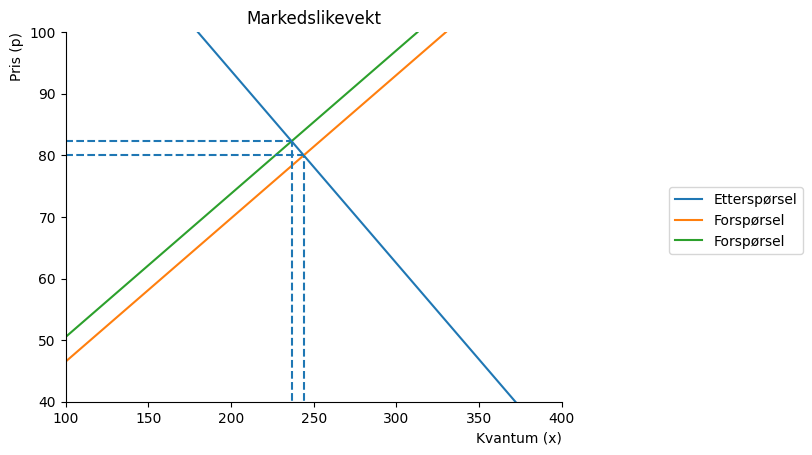

In [403]:

x_num=np.linspace(0.1,100,100)

#lag en akse

def create_ax():
                fig, ax = plt.subplots()
                ax.set_ylabel('Pris (p)', loc='top')
                ax.set_xlabel('Kvantum (x)', loc='right')
                ax.spines['top'].set_color('none')
                ax.spines['right'].set_color('none')
                ax.set(xlim=(100,400))
                ax.set(ylim=(40,100))
                
                return fig, ax

fig, ax = create_ax()

# plott funksjonen

ax.plot(demand(x_num), x_num, label='Etterspørsel')
ax.plot(supply(x_num, 0), x_num, label='Forspørsel')
ax.plot(supply(x_num, 4), x_num, label='Forspørsel')
#make hlines and vlines for equilibrium
ax.hlines(x_eq_fn(0,0), 0, p_eq_fn(0,0), linestyles='dashed')
ax.hlines(x_eq_fn(4,0), 0, p_eq_fn(4,0), linestyles='dashed')
#
ax.vlines(p_eq_fn(0,0), 0, x_eq_fn(0,0), linestyles='dashed')
ax.vlines(p_eq_fn(4,0), 0, x_eq_fn(4,0), linestyles='dashed')


# tittel
ax.set_title('Markedslikevekt')

#vis navnene:
ax.legend(bbox_to_anchor=(1.5,0.6));

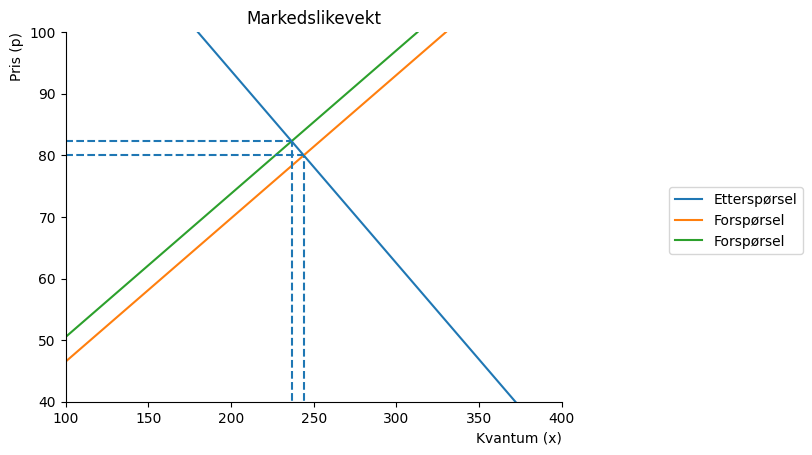

In [404]:
q = np.linspace(0,x_eq,100)

ax.legend(bbox_to_anchor=(1.5,0.6))
fig

In [234]:
from IPython.display import Markdown
tbl=f"""
|                     | Før avgift            |Etter avgift    | Endring (etter avgift-før avgift)|
| :-------------------| :----------------------------------------|:-------------|:---------------|
| Konsumentpris       | {np.round(float(x_eq),2)}    | |  |
| Produsentpris       | |   |  |
| Kvantum             |  |   |    |
| Konsumentoverskudd: |  | |     |
| Produsentoverskudd: | |  |   |
| KO + PO:            |    | |  |
| Skatteproveny       |0  | | |
| Dødvektstap         |0   |   ||
"""
display(Markdown(tbl))


|                     | Før avgift            |Etter avgift    | Endring (etter avgift-før avgift)|
| :-------------------| :----------------------------------------|:-------------|:---------------|
| Konsumentpris       | 80.0    | |  |
| Produsentpris       | |   |  |
| Kvantum             |  |   |    |
| Konsumentoverskudd: |  | |     |
| Produsentoverskudd: | |  |   |
| KO + PO:            |    | |  |
| Skatteproveny       |0  | | |
| Dødvektstap         |0   |   ||
